# Import Libraries

In [3]:
# import
import requests
import psycopg2
import psycopg2.extras
import datetime
from datetime import datetime
from pandas import DataFrame
import json
import calendar

import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
import cufflinks as cf
tls.set_credentials_file(username='kwarodom', api_key='ljMtxORMkyx0JmiDwIyT')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
%matplotlib inline

# checkout data

In [4]:
data_set = pd.read_csv("load_srisaengtham.csv", parse_dates = True, index_col = 0)
data_set.head()
# data_set.info()

,Date,Time,Volt,Current,Earth Leak,Pwr.Factor,APower(W),RPower(Var),Energy(Wh),REnergy(Varh),Status,AFCI_Arc,CP.A0.Mag,CP.A0.rms,CP.Irms.rate,CP.DC.rate,CP.B1.rms,AFE.I_A,AFE.V,CP.PFCI.T_High
ID,,,,,,,,,,,,,,,,,,,,
124930529,23/1/2018,15:37:41,227.612,0.0,0.0,0.999,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124930529,23/1/2018,15:38:03,228.140,0.0,0.0,0.999,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124930529,23/1/2018,15:38:13,227.705,0.0,0.0,0.999,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124930529,23/1/2018,15:38:31,230.248,0.0,0.0,0.999,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124930529,23/1/2018,15:38:45,233.189,0.0,0.0,0.999,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_set["datetime"] = data_set["Date"] + " " + data_set["Time"]

In [6]:
data_set.head()

,Date,Time,Volt,Current,Earth Leak,Pwr.Factor,APower(W),RPower(Var),Energy(Wh),REnergy(Varh),...,AFCI_Arc,CP.A0.Mag,CP.A0.rms,CP.Irms.rate,CP.DC.rate,CP.B1.rms,AFE.I_A,AFE.V,CP.PFCI.T_High,datetime
ID,,,,,,,,,,,,,,,,,,,,,
124930529,23/1/2018,15:37:41,227.612,0.0,0.0,0.999,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23/1/2018 15:37:41
124930529,23/1/2018,15:38:03,228.140,0.0,0.0,0.999,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23/1/2018 15:38:03
124930529,23/1/2018,15:38:13,227.705,0.0,0.0,0.999,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23/1/2018 15:38:13
124930529,23/1/2018,15:38:31,230.248,0.0,0.0,0.999,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23/1/2018 15:38:31
124930529,23/1/2018,15:38:45,233.189,0.0,0.0,0.999,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23/1/2018 15:38:45


In [7]:
new_data_set = data_set.drop("Date", axis=1)
new_data_set.drop("Time", axis=1)

,Volt,Current,Earth Leak,Pwr.Factor,APower(W),RPower(Var),Energy(Wh),REnergy(Varh),Status,AFCI_Arc,CP.A0.Mag,CP.A0.rms,CP.Irms.rate,CP.DC.rate,CP.B1.rms,AFE.I_A,AFE.V,CP.PFCI.T_High,datetime
ID,,,,,,,,,,,,,,,,,,,
124930529,227.612,0.000,0.0,0.999,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23/1/2018 15:37:41
124930529,228.140,0.000,0.0,0.999,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23/1/2018 15:38:03
124930529,227.705,0.000,0.0,0.999,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23/1/2018 15:38:13
124930529,230.248,0.000,0.0,0.999,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23/1/2018 15:38:31
124930529,233.189,0.000,0.0,0.999,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23/1/2018 15:38:45
124930529,235.651,0.000,0.0,0.999,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23/1/2018 15:39:01
124930529,236.009,0.264,0.0,-0.933,-55.0,-14.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23/1/2018 15:39:17
124930529,235.909,0.392,0.0,-0.927,-86.0,-23.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23/1/2018 15:39:33
124930529,235.464,0.470,0.0,0.611,-153.0,135.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23/1/2018 15:39:49


In [8]:
new_data_set.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Volt,44200.0,231.049890,7.819678,203.906,225.6300,230.178,236.00500,251.873
Current,44200.0,2.302650,2.243552,0.000,0.5550,1.288,3.70000,14.719
Earth Leak,44200.0,126.743620,337.634690,0.000,0.0000,0.000,2.00000,1814.000
Pwr.Factor,44200.0,0.154135,0.591462,-1.000,-0.3530,0.229,0.77800,0.999
APower(W),44200.0,233.556357,547.385306,-2502.000,-34.0000,42.000,435.00000,3102.000
RPower(Var),44200.0,155.922715,393.265496,-1289.000,-93.0000,13.000,478.00000,1491.000
Energy(Wh),44200.0,2329.427851,2233.881526,-3373.000,373.0000,2472.000,4126.00000,6884.000
REnergy(Varh),44200.0,3570.016742,3926.307474,-3065.000,322.0000,3263.500,5566.00000,14854.000
Status,44200.0,0.536290,1.362936,0.000,0.0000,0.000,0.00000,4.000
AFCI_Arc,1.0,3.000000,NaN,3.000,3.0000,3.000,3.00000,3.000


In [29]:
new_data_set["datetime"].iloc[0]

'23/1/2018 15:37:41'

In [36]:
converted_data = pd.to_datetime(new_data_set["datetime"], format='%d/%m/%Y %H:%M:%S')
converted_data.head()

ID
124930529   2018-01-23 15:37:41
124930529   2018-01-23 15:38:03
124930529   2018-01-23 15:38:13
124930529   2018-01-23 15:38:31
124930529   2018-01-23 15:38:45
Name: datetime, dtype: datetime64[ns]

In [51]:
new_data_set["datetime"] = pd.to_datetime(new_data_set["datetime"], format='%d/%m/%Y %H:%M:%S')
new_data_set.head()
new_data_set = new_data_set.drop('Time')

In [54]:
import datetime
from datetime import timedelta
start_date = datetime.datetime.now().date() - timedelta(days=10)
end_date = datetime.datetime.now().date() - timedelta(days=9)
print(start_date)
print(end_date)

2018-01-24
2018-01-25


In [66]:
mask = (new_data_set['datetime'] > start_date) & (new_data_set['datetime'] <= end_date)
print(len(new_data_set.loc[mask]))
data_to_use = new_data_set.loc[mask]
data_to_use.head()

5370


,Time,Volt,Current,Earth Leak,Pwr.Factor,APower(W),RPower(Var),Energy(Wh),REnergy(Varh),Status,AFCI_Arc,CP.A0.Mag,CP.A0.rms,CP.Irms.rate,CP.DC.rate,CP.B1.rms,AFE.I_A,AFE.V,CP.PFCI.T_High,datetime
ID,,,,,,,,,,,,,,,,,,,,
124930529,00:00:03,225.279,3.557,0.0,0.779,628.0,487.0,4919.0,5432.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-24 00:00:03
124930529,00:00:19,224.732,3.533,0.0,0.779,621.0,481.0,4921.0,5436.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-24 00:00:19
124930529,00:00:35,224.852,3.535,0.0,0.779,621.0,482.0,4924.0,5439.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-24 00:00:35
124930529,00:00:51,224.939,3.537,0.0,0.779,621.0,483.0,4927.0,5443.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-24 00:00:51
124930529,00:01:08,225.253,3.550,0.0,0.778,625.0,486.0,4930.0,5446.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-24 00:01:08


In [62]:
data_to_use.columns

Index(['Time', 'Volt', 'Current', 'Earth Leak', 'Pwr.Factor', 'APower(W)',
       'RPower(Var)', 'Energy(Wh)', 'REnergy(Varh)', 'Status', 'AFCI_Arc',
       'CP.A0.Mag', 'CP.A0.rms', 'CP.Irms.rate', 'CP.DC.rate', 'CP.B1.rms',
       'AFE.I_A', 'AFE.V', 'CP.PFCI.T_High', 'datetime'],
      dtype='object')

# EDA
Let's create some simple plots to check out the data!

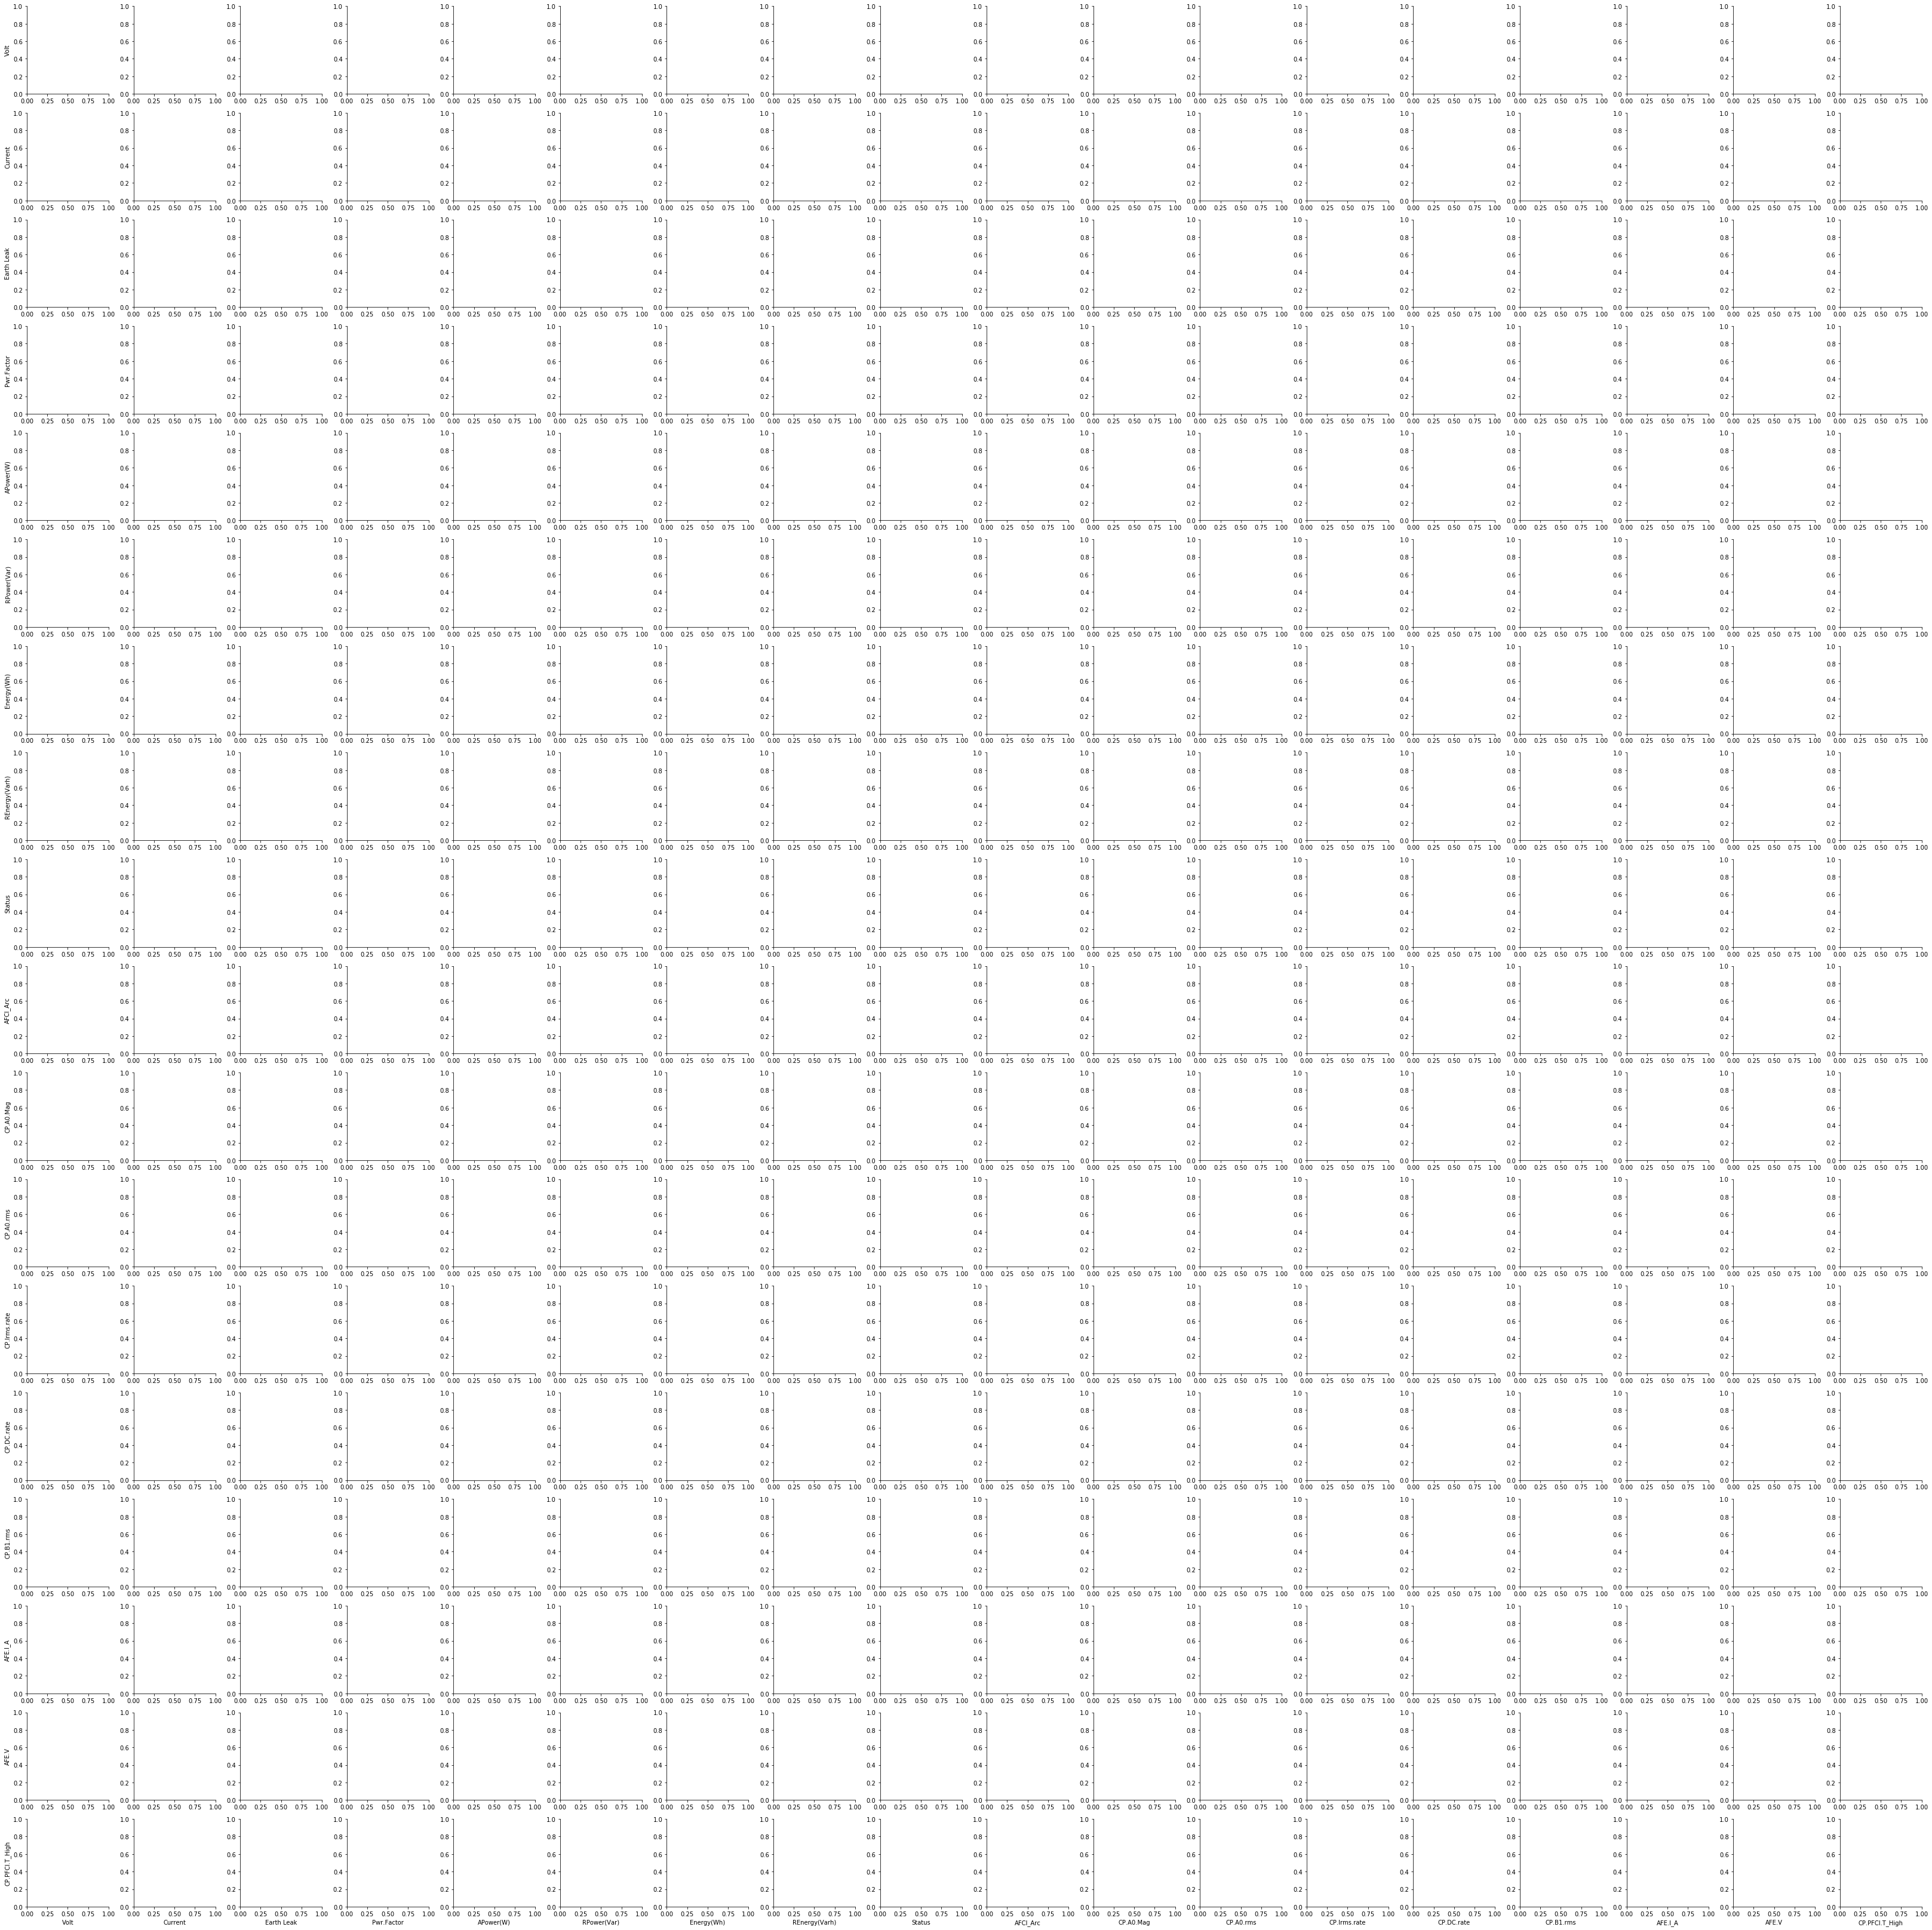

In [63]:
sns.pairplot(data_to_use)

In [69]:
# sns.distplot(data_to_use['APower(W)'])
print(data_to_use['APower(W)'])

ID
124930529    628.0
124930529    621.0
124930529    621.0
124930529    621.0
124930529    625.0
124930529    625.0
124930529    626.0
124930529    625.0
124930529    626.0
124930529    625.0
124930529    625.0
124930529    623.0
124930529    626.0
124930529    624.0
124930529    626.0
124930529    628.0
124930529    627.0
124930529    629.0
124930529    633.0
124930529    634.0
124930529    632.0
124930529    627.0
124930529    632.0
124930529    635.0
124930529    631.0
124930529    631.0
124930529    631.0
124930529    629.0
124930529    634.0
124930529    635.0
             ...  
124930529    490.0
124930529    492.0
124930529    491.0
124930529    493.0
124930529    491.0
124930529    490.0
124930529    494.0
124930529    496.0
124930529    492.0
124930529    492.0
124930529    495.0
124930529    492.0
124930529    491.0
124930529    490.0
124930529    492.0
124930529    495.0
124930529    497.0
124930529    493.0
124930529    495.0
124930529    495.0
124930529    493.0
124930529

In [72]:
import datetime
from datetime import timedelta
start_date = datetime.datetime.now().date() - timedelta(days=11)
end_date = datetime.datetime.now().date() - timedelta(days=10)
print(start_date)
print(end_date)
mask = (new_data_set['datetime'] > start_date) & (new_data_set['datetime'] <= end_date)
print(len(new_data_set.loc[mask]))
data_to_use2 = new_data_set.loc[mask]
data_to_use2.head()

2018-01-23
2018-01-24
1800


,Time,Volt,Current,Earth Leak,Pwr.Factor,APower(W),RPower(Var),Energy(Wh),REnergy(Varh),Status,AFCI_Arc,CP.A0.Mag,CP.A0.rms,CP.Irms.rate,CP.DC.rate,CP.B1.rms,AFE.I_A,AFE.V,CP.PFCI.T_High,datetime
ID,,,,,,,,,,,,,,,,,,,,
124930529,15:37:41,227.612,0.0,0.0,0.999,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-23 15:37:41
124930529,15:38:03,228.140,0.0,0.0,0.999,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-23 15:38:03
124930529,15:38:13,227.705,0.0,0.0,0.999,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-23 15:38:13
124930529,15:38:31,230.248,0.0,0.0,0.999,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-23 15:38:31
124930529,15:38:45,233.189,0.0,0.0,0.999,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-23 15:38:45


In [77]:
data_to_use.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Volt,5369.0,229.948025,9.624421,205.558,223.380,228.225,238.568,251.451
Current,5369.0,3.550872,2.469837,0.375,0.637,3.371,5.338,13.066
Earth Leak,5369.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
Pwr.Factor,5369.0,0.457336,0.607077,-0.983,-0.378,0.802,0.852,0.986
APower(W),5369.0,681.711864,523.820731,26.000,128.000,610.000,1032.000,3062.000
RPower(Var),5369.0,365.082511,304.005287,-164.000,-63.000,457.000,553.000,1058.000
Energy(Wh),5369.0,3676.525237,2280.792055,0.000,1583.000,3498.000,6350.000,6884.000
REnergy(Varh),5369.0,3621.122183,2475.145539,-126.000,1289.000,3441.000,6424.000,7076.000
Status,5369.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
AFCI_Arc,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
trace1 = go.Scatter(
#     x=data_set.index[(data_set.shape[0]-len(y_test)):data_set.shape[0]],
    x=data_to_use['datetime'],
    y=data_to_use['APower(W)'],
    name='power'
)
# y_test
trace2 = go.Scatter(
    x=data_to_use2['datetime'],
    y=data_to_use2['APower(W)'],
    name='y_test'
)

data = [trace1, trace2]
layout = go.Layout(
    xaxis=dict(
        title='time'
    ),
    yaxis=dict(
        title='power (watt)'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='test/test')
py.image.save_as(fig, filename='load.png')

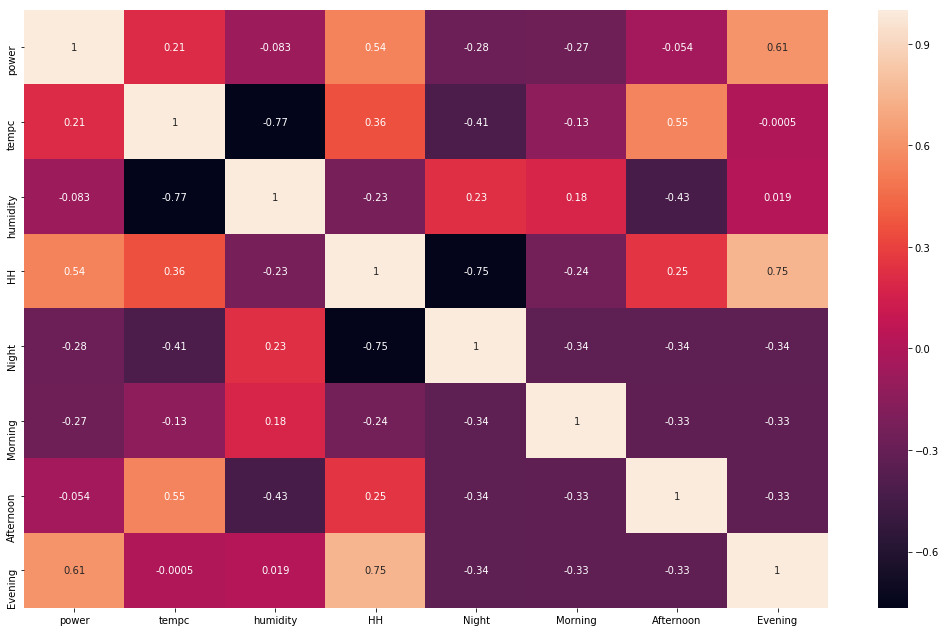

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(18, 11)
# sns.heatmap(data_set.corr(), annot = True)
sns.heatmap(data_set[['power','tempc','humidity','HH','Night', 
              'Morning', 'Afternoon', 'Evening']].corr(), annot = True)

# Tensorflow DNN Regressor
add more info here

In [18]:
# X = data_set[['tempc','humidity','wind_speed','pressure','hourly_sunrise', 'hourly_moon']]
# X = data_set[['tempc','humidity','wind_speed','pressure','hour']]
X = data_set[['tempc', 'humidity', 'HH', 'H0', 'H1', 'H2', 'H3', 'H4', 'H5', 
              'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 
              'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'Night', 
              'Morning', 'Afternoon', 'Evening']]
y = data_set['power']
X

,tempc,humidity,HH,H0,H1,H2,H3,H4,H5,H6,...,H18,H19,H20,H21,H22,H23,Night,Morning,Afternoon,Evening
datetime,,,,,,,,,,,,,,,,,,,,,
2017-05-01 00:00:00,25.0,94.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2017-05-01 01:00:00,24.0,94.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2017-05-01 02:00:00,25.0,65.0,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2017-05-01 03:00:00,25.0,65.0,3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2017-05-01 04:00:00,23.0,100.0,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2017-05-01 05:00:00,25.0,65.0,5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2017-05-01 06:00:00,25.0,65.0,6,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2017-05-01 07:00:00,23.0,100.0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2017-05-01 08:00:00,25.0,89.0,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(data=scaler.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(data=scaler.fit_transform(X_test),columns = X_test.columns)
y_train = y_train.reset_index()['power']
y_test = y_test.reset_index()['power']

In [25]:
X_train.head()

,tempc,humidity,HH,H0,H1,H2,H3,H4,H5,H6,...,H18,H19,H20,H21,H22,H23,Night,Morning,Afternoon,Evening
0,0.3750,0.742424,0.347826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.1875,1.000000,0.130435,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.3750,0.909091,0.304348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.2500,0.909091,0.173913,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.7500,0.424242,0.521739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
import tensorflow as tf

In [29]:
tempc = tf.feature_column.numeric_column('tempc')
humidity = tf.feature_column.numeric_column('humidity')
# wind_speed = tf.feature_column.numeric_column('wind_speed')
# pressure = tf.feature_column.numeric_column('pressure')
# hourly_sunrise = tf.feature_column.numeric_column('hourly_sunrise')
# hourly_moon = tf.feature_column.numeric_column('hourly_moon')
# hour = tf.feature_column.numeric_column('HH')
hour0 = tf.feature_column.numeric_column('H0')
hour1= tf.feature_column.numeric_column('H1')
hour2 = tf.feature_column.numeric_column('H2')
hour3 = tf.feature_column.numeric_column('H3')
hour4 = tf.feature_column.numeric_column('H4')
hour5 = tf.feature_column.numeric_column('H5')
hour6 = tf.feature_column.numeric_column('H6')
hour7 = tf.feature_column.numeric_column('H7')
hour8 = tf.feature_column.numeric_column('H8')
hour9 = tf.feature_column.numeric_column('H9')
hour10 = tf.feature_column.numeric_column('H10')
hour11 = tf.feature_column.numeric_column('H11')
hour12 = tf.feature_column.numeric_column('H12')
hour13 = tf.feature_column.numeric_column('H13')
hour14 = tf.feature_column.numeric_column('H14')
hour15 = tf.feature_column.numeric_column('H15')
hour16 = tf.feature_column.numeric_column('H16')
hour17 = tf.feature_column.numeric_column('H17')
hour18 = tf.feature_column.numeric_column('H18')
hour19 = tf.feature_column.numeric_column('H19')
hour20 = tf.feature_column.numeric_column('H20')
hour21 = tf.feature_column.numeric_column('H21')
hour22 = tf.feature_column.numeric_column('H22')
hour23 = tf.feature_column.numeric_column('H23')
morning = tf.feature_column.numeric_column('Morning')
afternoon = tf.feature_column.numeric_column('Afternoon')
evening = tf.feature_column.numeric_column('Evening')
night = tf.feature_column.numeric_column('Night')

In [30]:
# feat_cols = [ tempc, humidity, wind_speed, pressure, hourly_sunrise, hourly_moon]
# feat_cols = [ tempc, humidity, wind_speed, pressure, hour]
# feat_cols = [ tempc, humidity, hour, morning, afternoon, evening, night]
# feat_cols = [ tempc, humidity, morning, afternoon, evening, night, hour, hour0, hour1, hour2, hour3, hour4, hour5, hour6, hour7, hour8, hour9, hour10, hour11, hour12, hour13, hour14, hour15, hour16, hour17, hour18, hour19, hour20, hour21, hour22, hour23]
feat_cols = [ tempc, humidity, morning, afternoon, evening, night, hour0, hour1, hour2, hour3,
             hour4, hour5, hour6, hour7, hour8, hour9, hour10, hour11, hour12, hour13, hour14, 
             hour15, hour16, hour17, hour18, hour19, hour20, hour21, hour22, hour23]

In [31]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train ,batch_size=10, 
                                                 num_epochs=100, shuffle=False)

In [32]:
model = tf.estimator.DNNRegressor(hidden_units=[8,8,8,8],feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/5n/07vgnpmn42d_2j8lpgbf_mjw0000gn/T/tmppr68a2tk', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [33]:
model.train(input_fn=input_func,steps=20000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/5n/07vgnpmn42d_2j8lpgbf_mjw0000gn/T/tmppr68a2tk/model.ckpt.
INFO:tensorflow:loss = 4882.02, step = 1
INFO:tensorflow:global_step/sec: 281.137
INFO:tensorflow:loss = 400.132, step = 101 (0.357 sec)
INFO:tensorflow:global_step/sec: 277.216
INFO:tensorflow:loss = 653.019, step = 201 (0.361 sec)
INFO:tensorflow:global_step/sec: 296.726
INFO:tensorflow:loss = 139.492, step = 301 (0.337 sec)
INFO:tensorflow:global_step/sec: 309.386
INFO:tensorflow:loss = 646.621, step = 401 (0.323 sec)
INFO:tensorflow:global_step/sec: 309.289
INFO:tensorflow:loss = 330.579, step = 501 (0.323 sec)
INFO:tensorflow:global_step/sec: 306.791
INFO:tensorflow:loss = 190.624, step = 601 (0.326 sec)
INFO:tensorflow:global_step/sec: 307.553
INFO:tensorflow:loss = 247.656, step = 701 (0.325 sec)
INFO:tensorflow:global_step/sec: 308.989
INFO:tensorflow:loss = 256.569, step = 801 (0.324 sec)
INFO:tensorflow:global_step/

In [34]:
predict_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [35]:
pred_gen = model.predict(predict_input_func)

In [36]:
predictions = list(pred_gen)
predictions

INFO:tensorflow:Restoring parameters from /var/folders/5n/07vgnpmn42d_2j8lpgbf_mjw0000gn/T/tmppr68a2tk/model.ckpt-5250


[{'predictions': array([ 27.85272598], dtype=float32)},
 {'predictions': array([ 23.23839378], dtype=float32)},
 {'predictions': array([ 22.90254593], dtype=float32)},
 {'predictions': array([ 15.72119331], dtype=float32)},
 {'predictions': array([ 34.38401794], dtype=float32)},
 {'predictions': array([ 20.40149689], dtype=float32)},
 {'predictions': array([ 23.34479332], dtype=float32)},
 {'predictions': array([ 24.72588539], dtype=float32)},
 {'predictions': array([ 22.5635128], dtype=float32)},
 {'predictions': array([ 15.47433758], dtype=float32)},
 {'predictions': array([ 20.6528244], dtype=float32)},
 {'predictions': array([ 22.30021858], dtype=float32)},
 {'predictions': array([ 27.46649742], dtype=float32)},
 {'predictions': array([ 17.65476799], dtype=float32)},
 {'predictions': array([ 18.10803032], dtype=float32)},
 {'predictions': array([ 23.91658592], dtype=float32)},
 {'predictions': array([ 28.0080204], dtype=float32)},
 {'predictions': array([ 15.81701565], dtype=float3

In [37]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['predictions'])

In [38]:
len(final_preds)

225

In [39]:
mean_squared_error(y_test,final_preds)**0.5

NameError: name 'mean_squared_error' is not defined

In [40]:
len(y_test)

225

In [41]:
data_set.shape[0]

750

In [43]:
trace1 = go.Scatter(
    x=data_set.index[(data_set.shape[0]-len(y_test)):data_set.shape[0]],
    y=final_preds,
    name='predictions'
)
# y_test
trace2 = go.Scatter(
    x=data_set.index[(data_set.shape[0]-len(y_test)):data_set.shape[0]],
    y=y_test,
    name='y_test'
)

data = [trace1, trace2]
layout = go.Layout(
    xaxis=dict(
        title='time'
    ),
    yaxis=dict(
        title='power (watt)'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='test/test')

In [44]:
# print(final_preds)
# print(y_test)
res = [x - y for x, y in zip(final_preds, y_test)]

In [45]:
trace1 = go.Scatter(
    x=data_set.index[(data_set.shape[0]-len(y_test)):data_set.shape[0]],
    y=res,
    name='residual'
)
data = [trace1]
layout = go.Layout(
    xaxis=dict(
        title='time'
    ),
    yaxis=dict(
        title='power (watt)'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [46]:
from sklearn import metrics

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, final_preds))
print('MSE:', metrics.mean_squared_error(y_test, final_preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

MAE: 4.81316254244
MSE: 35.235126303
RMSE: 5.93591832011


# result of training set

In [48]:
predict_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_train,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

pred_gen = model.predict(predict_input_func)

predictions = list(pred_gen)

final_preds = []
for pred in predictions:
    final_preds.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from /var/folders/5n/07vgnpmn42d_2j8lpgbf_mjw0000gn/T/tmppr68a2tk/model.ckpt-5250


In [49]:
print('MAE:', metrics.mean_absolute_error(y_train, final_preds))
print('MSE:', metrics.mean_squared_error(y_train, final_preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, final_preds)))

MAE: 4.05189776507
MSE: 25.5258326172
RMSE: 5.05230963196


In [50]:
len(y_train)

525

In [51]:
trace1 = go.Scatter(
    x=data_set.index[0:len(y_train)],
    y=final_preds,
    name='predictions'
)
# y_test
trace2 = go.Scatter(
    x=data_set.index[0:len(y_train)],
    y=y_train,
    name='y_train',
)

data = [trace1, trace2]
layout = go.Layout(
    xaxis=dict(
        title='time'
    ),
    yaxis=dict(
        title='residuals'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [52]:
# print(final_preds)
# print(y_test)
res = [x - y for x, y in zip(final_preds, y_train)]

trace1 = go.Scatter(
    x=data_set.index[(data_set.shape[0]-len(y_train)):data_set.shape[0]],
    y=res,
    name='residual'
)
data = [trace1]
layout = go.Layout(
    xaxis=dict(
        title='time'
    ),
    yaxis=dict(
        title='power (watt)'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)